In [1]:
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline()
    for line in dataFile:
        d, m = line.split(' ')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

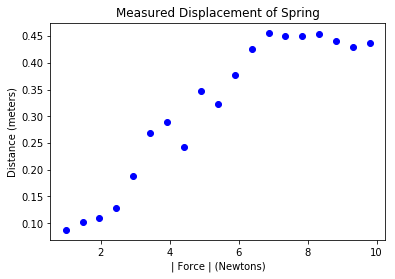

In [6]:
import matplotlib.pylab as pylab

# バネの伸びた距離とバネを伸ばす力(m(重さ)*9.81m/s^2(重力加速度))をプロット
def plotData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('| Force | (Newtons)')
    pylab.ylabel('Distance (meters)')

plotData('springData.txt')

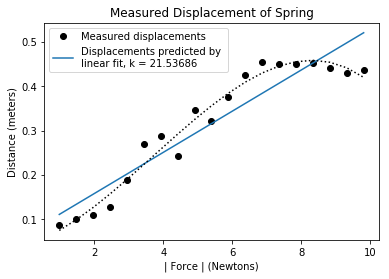

In [14]:
"""
線形回帰による適合

データにもっともよく適合(fit)する曲線(直線を含む)を当てはめるということは、
定量的評価値として目的関数を定義することが必要である。

目的関数を定義すれば、もっとも良い適合曲線を見つけることは、この目的関数の値を最小化（または最大化）する最適化問題となる。

もっともよく用いられる目的関数は最小２乗(last squares)である。

最小二乗の目的関数を式にすると次のようになる。
sum((観測値-予測値)**2)

最小二乗に本もよく適合する最小二乗曲線を求めるには、pylabのビルトイン関数、polyfitを使えば良い。
ployfitで用いられるアルゴリズムは線形回帰(linear regression)と呼ばれる。
線形回帰と多項式回帰は通常区別しない。

配列で表される点の集合に対して最小2乗曲線となる次数nの多項式を求めるには、次のコードを実行すればよい。
pylab.poloyfit(observedXVals, observedYVals, n)
"""

def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    forces = pylab.array(masses)*9.81
    pylab.plot(forces, distances, 'ko', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('| Force | (Newtons)')
    pylab.ylabel('Distance (meters)')
    # 1次の適合曲線(直線)を求める
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*pylab.array(forces)+b
    k=1.0/a # バネ定数(力の変化量/距離の変化量つまり傾きの逆数)
    pylab.plot(forces, predictedDistances, label='Displacements predicted by \nlinear fit, k = ' + str(round(k, 5)))
    pylab.legend(loc = 'best')
    
    # 3次の適合曲線(直線)を求める
    fit = pylab.polyfit(forces, distances, 3)
    predictedDistances = pylab.polyval(fit, forces)
    # a,b,c,d = pylab.polyfit(forces, distances, 3)
    # predictedDistances = a*(forces**3) + b*(forces**2) + c*(forces) + d
    pylab.plot(forces, predictedDistances, 'k:', label='cubic fit')

fitData('springData.txt')

# ３次曲線による適合は、このデータのモデルとしてずっと良いものに見える。しかし、本当にそうだろうか。おそらく、そうではない。
# 過剰適合となる可能性がある。過剰適合は、モデルが過度に複雑な時に生じる。
# 例えば、データ量に対してパラメータが多すぎる場合が挙げられる。
# 過剰適合が生じた時に得られた適合は、データ間の意味のある関係よりもむしろ、データに含まれているノイズを捉えている可能性がある。
# 過剰適合したモデルは、予測能力には乏しいことが多い。

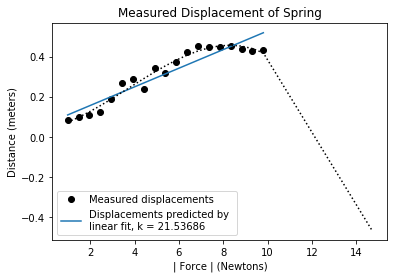

In [25]:
# 過剰適合の例

def fitData2(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    forces = pylab.array(masses)*9.81
    pylab.plot(forces, distances, 'ko', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('| Force | (Newtons)')
    pylab.ylabel('Distance (meters)')
    # 1次の適合曲線(直線)を求める
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*pylab.array(forces)+b
    k=1.0/a # バネ定数(力の変化量/距離の変化量つまり傾きの逆数)
    pylab.plot(forces, predictedDistances, label='Displacements predicted by \nlinear fit, k = ' + str(round(k, 5)))
    pylab.legend(loc = 'best')
    
    # 3次の適合曲線(直線)を求める
    fit = pylab.polyfit(forces, distances, 3)
    # 質量1.5kgの時の結果をこのモデルで予測する
    masses.append(1.5)
    forces = pylab.array(masses)*9.81
    predictedDistances = pylab.polyval(fit, forces)
    pylab.plot(forces, predictedDistances, 'k:', label='cubic fit')

fitData2('springData.txt')

# 重さが1.5kgのとき長さがマイナスになるというあり得ない結果がプロットされる